# Sheet 4: SED Analysis

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import copy
import importlib

import binary_hopfield as sim
import Ising_Model as im
import SED_utility as util

from pathlib import Path

this_folder = Path.cwd()
sed_data_folder = Path(Path.cwd()/'SED_DATA')
plots_folder = Path(Path.cwd()/'PLOTS')
results_folder = Path(Path.cwd()/'CALIB_RESULTS')


In [29]:
#load up SED maps
importlib.reload(util)
files = os.listdir(sed_data_folder)
num_files = len(files)
print('num files = ', num_files)
files[:10]
df0 = util.get_SED_df(sed_data_folder,files[0])
L = df0['x'].values.shape[0]
XS = np.array([df0['x'].values,df0['y'].values]).T
dmat_SED = distance_matrix(XS,XS)
num_nbrs=6
AI = util.make_Adj(XS,num_nbrs)

importlib.reload(sim)
XB,XUK,survey_nodes = util.load_maps(this_folder)
XUK = XUK/1000
XB = XB/1000

num files =  68


## Moran $I$ analysis

In [6]:
importlib.reload(util)
SED_Is = []
for file in files:
    df = util.get_SED_df(sed_data_folder,file)
    I = util.moran_I(df['states'],AI)
    SED_Is.append(I)

SED_Is = np.array(SED_Is)
idxs = np.argsort(SED_Is)
SED_Is_sorted = [SED_Is[i] for i in idxs]
files_sorted = [files[i] for i in idxs]

In [39]:
len(SED_Is[SED_Is>0.3])/len(SED_Is)

0.8235294117647058

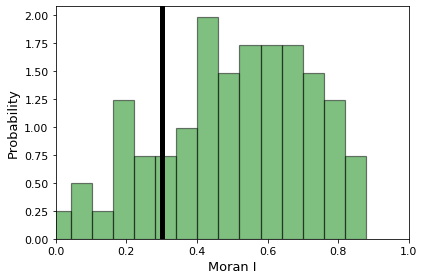

In [36]:
plt.hist(SED_Is,15,density=True,alpha=0.5,color='green',edgecolor='black', linewidth=1.2)
plt.axvline(0.3,c='k',linewidth=5)

plt.tick_params(labelsize=11)
plt.xlabel('Moran I',size=13)
plt.ylabel('Probability',size=13)
plt.xlim(0,1)
plt.tight_layout()
plt.savefig(plots_folder/'I_dist_SED.pdf')
plt.show()

In [8]:
importlib.reload(util)
Is = []
for file in files:
    df = util.get_SED_df(sed_data_folder,file)
    I = util.moran_I(df['states'],AI)
    Is.append(I)

Is = np.array(Is)
idxs = np.argsort(Is)

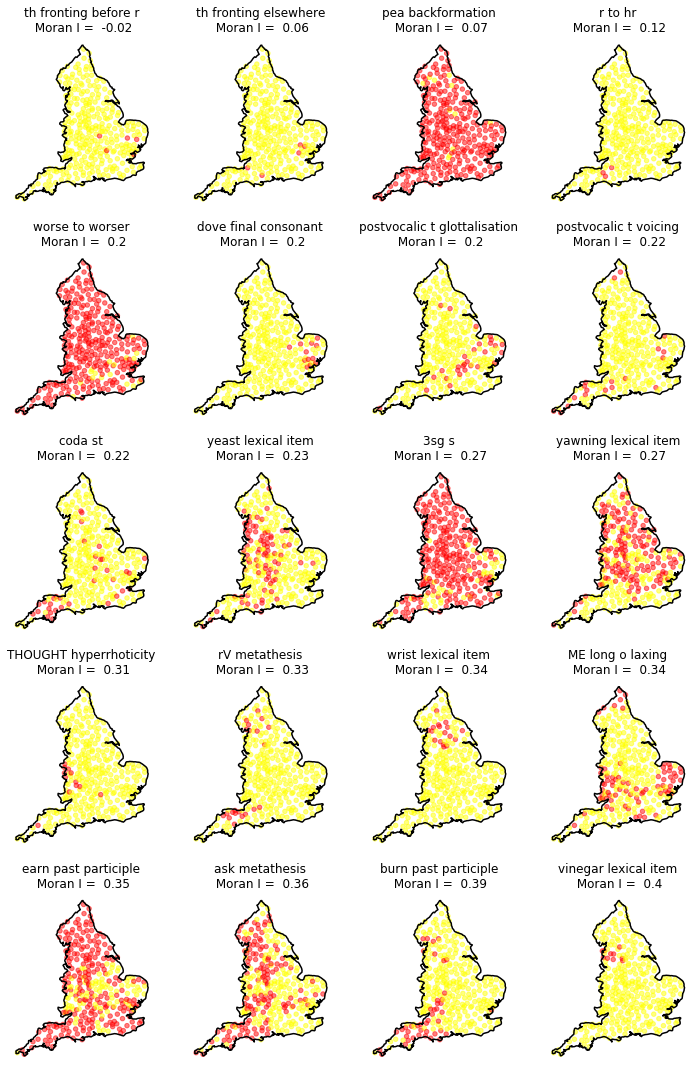

In [9]:
rows=5
cols=4
k=0
fig, axs = plt.subplots(rows, cols,figsize=(2.5*cols,3*rows))
for i in range(rows):
    for j in range(cols):
        idx = idxs[k]
        file = files[idx]
        df = util.get_SED_df(sed_data_folder,file)
        axs[i,j].plot(XB[:,0],XB[:,1],'k',rasterized=True)
        axs[i,j].scatter(df['x'],df['y'],c=df['states'],cmap='autumn',s=20,alpha=0.5,rasterized=True)
        title = file[:-4]+'\n Moran I =  '+str(np.round(Is[idx],2))
        title = title.replace('_',' ')
        axs[i,j].set_title(title,size=12)
        axs[i,j].axis('off')
        k += 1
plt.tight_layout()
plt.savefig(plots_folder/'SED_Low_Moran.pdf')

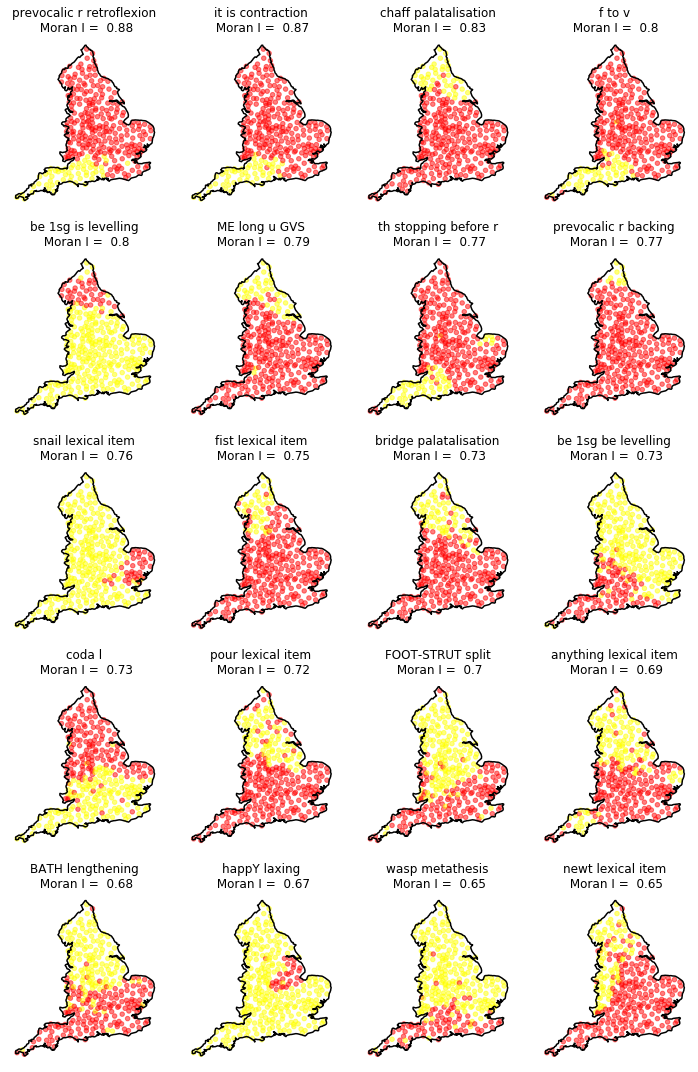

In [10]:
rows=5
cols=4
k=len(files)-1
fig, axs = plt.subplots(rows, cols,figsize=(2.5*cols,3*rows))
for i in range(rows):
    for j in range(cols):
        idx = idxs[k]
        file = files[idx]
        df = util.get_SED_df(sed_data_folder,file)
        axs[i,j].plot(XB[:,0],XB[:,1],'k',rasterized=True)
        axs[i,j].scatter(df['x'],df['y'],c=df['states'],cmap='autumn',s=20,alpha=0.5,rasterized=True)
        title = file[:-4]+'\n Moran I =  '+str(np.round(Is[idx],2))
        title = title.replace('_',' ')
        axs[i,j].set_title(title,size=12)
        axs[i,j].axis('off')
        k -= 1
plt.tight_layout()
plt.savefig(plots_folder/'SED_High_Moran.pdf',dpi=400)

## Load up the calibrated MRFs

In [11]:
epsilon=10
df_bc = pd.read_csv('neutral_N5_b_c_epsilon_{}.csv'.format(epsilon))
b_vals = df_bc['b'].values
c_vals = df_bc['c'].values
print(df_bc)

df_mu = pd.read_csv('interface_mu_vals.csv'.format(epsilon))
mu_vals = df_mu['mu'].values
print(df_mu)

importlib.reload(util)
potts_thetas = []
potts_lnZs = []
for mu in mu_vals:
    theta = util.load_matrix(results_folder,'THETA_Potts',mu)
    potts_thetas.append(theta)
    lnZ = util.load_matrix(results_folder,'lnZ_Potts',mu)
    potts_lnZs.append(lnZ[0,0])
    
neut_thetas = []
neut_lnZs = []
for b in b_vals:
    theta = util.load_matrix(results_folder,'THETA_Neutral',b)
    neut_thetas.append(theta)
    lnZ = util.load_matrix(results_folder,'lnZ_Neutral',b)
    neut_lnZs.append(lnZ[0,0])


       b         c
0  0.700 -0.074335
1  0.775 -0.068363
2  0.850 -0.055646
3  0.925 -0.029178
4  0.990 -0.005259
    mu
0   50
1  100
2  150
3  200
4  300
THETA_Potts_param_50.000.csv  loaded. 
lnZ_Potts_param_50.000.csv  loaded. 
THETA_Potts_param_100.000.csv  loaded. 
lnZ_Potts_param_100.000.csv  loaded. 
THETA_Potts_param_150.000.csv  loaded. 
lnZ_Potts_param_150.000.csv  loaded. 
THETA_Potts_param_200.000.csv  loaded. 
lnZ_Potts_param_200.000.csv  loaded. 
THETA_Potts_param_300.000.csv  loaded. 
lnZ_Potts_param_300.000.csv  loaded. 
THETA_Neutral_param_0.700.csv  loaded. 
lnZ_Neutral_param_0.700.csv  loaded. 
THETA_Neutral_param_0.775.csv  loaded. 
lnZ_Neutral_param_0.775.csv  loaded. 
THETA_Neutral_param_0.850.csv  loaded. 
lnZ_Neutral_param_0.850.csv  loaded. 
THETA_Neutral_param_0.925.csv  loaded. 
lnZ_Neutral_param_0.925.csv  loaded. 
THETA_Neutral_param_0.990.csv  loaded. 
lnZ_Neutral_param_0.990.csv  loaded. 


## Generate $I$ values from MRFs and compare to SED

In [12]:
importlib.reload(im)
importlib.reload(util)
loops = 10000
potts_I_vals=[]  
potts_MRF_states=[]

for theta in potts_thetas:
    sys = im.ising(theta,500)
    for i in range(loops):
        sys.update()
    for states in sys.states:
        potts_MRF_states.append(states)
        I = util.moran_I(states,AI)
        potts_I_vals.append(I)

In [22]:
importlib.reload(im)
importlib.reload(util)
loops = 10000
neut_I_vals=[]    

for theta in neut_thetas:
    sys = im.ising(theta,500)
    for i in range(loops):
        sys.update()
    for states in sys.states:
        I = util.moran_I(states,AI)
        neut_I_vals.append(I)

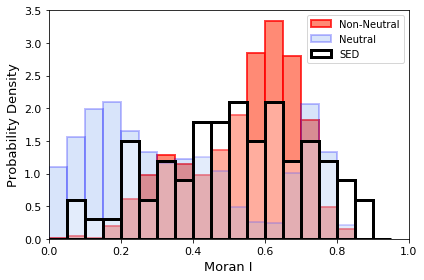

In [23]:
bins3 = np.arange(0,1,0.05)
bins4= np.arange(0,1,0.05)
plt.hist(potts_I_vals,density=True,alpha=0.75,bins=bins3,color='tomato',edgecolor='red',linewidth=2)
plt.hist(neut_I_vals,density=True,alpha=0.25,bins=bins3,color='cornflowerblue',edgecolor='blue',linewidth=2)
plt.hist(SED_Is,density=True,bins=bins4,fc=(1,1,1,0.3),edgecolor='black',linewidth=3)


plt.tick_params(labelsize=11)
plt.xlabel('Moran I',size=13)
plt.ylabel('Probability Density',size=13)

plt.ylim(0,3.5)
plt.xlim(0,1)

plt.legend(['Non-Neutral','Neutral','SED'])

plt.tight_layout()
plt.savefig(plots_folder/'I_dist_MRF_SED.pdf')
plt.show()

## Look at I distribution for each neutral $\theta$

In [46]:
importlib.reload(im)
importlib.reload(util)
loops = 10000
neut_I_vals_separate=[]    

for theta in neut_thetas:
    sys = im.ising(theta,200)
    for i in range(loops):
        sys.update()
    my_I_vals=[]
    for states in sys.states:
        I = util.moran_I(states,AI)
        my_I_vals.append(I)
    neut_I_vals_separate.append(my_I_vals)

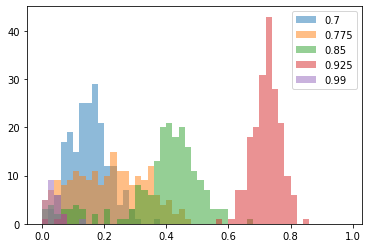

In [49]:
Ibins=np.arange(0,1,0.02)
for I_vals in neut_I_vals_separate:
    plt.hist(I_vals,bins=Ibins,alpha=0.5)
plt.legend(b_vals)
plt.show()

# Model inference

In [19]:
importlib.reload(util)
def ML(states):
    potts_lnPs = []
    neut_lnPs = []
    
    for mu, theta, lnZ in zip(mu_vals, potts_thetas, potts_lnZs):
        lnP = im.lnP(states,theta,lnZ)
        potts_lnPs.append(lnP)
    
    for b, theta, lnZ in zip(b_vals, neut_thetas, neut_lnZs):
        lnP = im.lnP(states,theta,lnZ)
        neut_lnPs.append(lnP)
        
    i = np.argmax(potts_lnPs)
    j = np.argmax(neut_lnPs)
    MLP = potts_lnPs[i] 
    MLN = neut_lnPs[j]
    if MLP>MLN:
        print('Potts, likelihood ratio = ', MLP- MLN, ' mu = ', mu_vals[i])
        return 'Potts'
    else:
        print('Neutral, likelihood ratio = ', MLN-MLP, 'b = ', b_vals[j])
        return 'Neutral'

def ML_file(file):
    df = util.get_SED_df(sed_data_folder,file)
    states = df['states']
    return ML(states)

3sg_s.csv
Potts, likelihood ratio =  4.631894201085075  mu =  200
Moran I =  0.2688076416337288
adder_lexical_item.csv
Potts, likelihood ratio =  17.50482538706865  mu =  200
Moran I =  0.5428628789399719
anything_lexical_item.csv
Potts, likelihood ratio =  8.801826003496473  mu =  150
Moran I =  0.6900877192982456
ask_metathesis.csv
Potts, likelihood ratio =  8.339643105248513  mu =  50
Moran I =  0.36075782677031576
BATH_lengthening.csv
Neutral, likelihood ratio =  8.898742442724512 b =  0.925
Moran I =  0.680919540229885


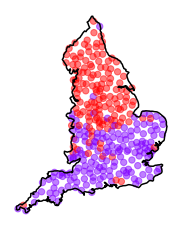

be_1sg_be_levelling.csv
Potts, likelihood ratio =  10.207441977338163  mu =  300
Moran I =  0.7293608009241432
be_1sg_is_levelling.csv
Potts, likelihood ratio =  20.397697887664293  mu =  200
Moran I =  0.8017589990026297
birch_palatalisation.csv
Potts, likelihood ratio =  12.943617347673637  mu =  200
Moran I =  0.43444055944055937
bridge_palatalisation.csv
Potts, likelihood ratio =  9.098693416227121  mu =  200
Moran I =  0.7343517138599106
burn_past_participle.csv
Potts, likelihood ratio =  6.788745881051554  mu =  100
Moran I =  0.3877648667122353
CARD_CORD_merger.csv
Potts, likelihood ratio =  27.07246824867579  mu =  200
Moran I =  0.6444444444444446
chaff_palatalisation.csv
Potts, likelihood ratio =  18.580013128231542  mu =  200
Moran I =  0.8262869088058533
CLOTH_lengthening.csv
Neutral, likelihood ratio =  3.7020675099411164 b =  0.775
Moran I =  0.47576734642602914


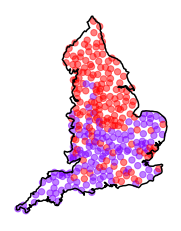

coda_l.csv
Potts, likelihood ratio =  5.96103286220449  mu =  150
Moran I =  0.7290542790542791
coda_st.csv
Potts, likelihood ratio =  4.8834447936710035  mu =  100
Moran I =  0.22109974424552425
dove_final_consonant.csv
Potts, likelihood ratio =  7.4337511619843895  mu =  200
Moran I =  0.2017897091722595
earn_past_participle.csv
Neutral, likelihood ratio =  3.443277577426926 b =  0.775
Moran I =  0.3524705882352942


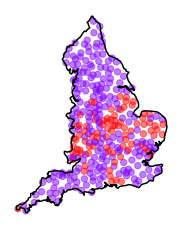

FACE_fronting_diphthong.csv
Neutral, likelihood ratio =  7.7703374777557315 b =  0.775
Moran I =  0.4051377118644068


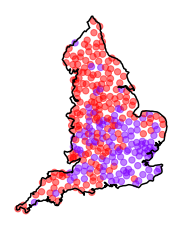

first_equative_conjunction.csv
Neutral, likelihood ratio =  6.977527382390136 b =  0.85
Moran I =  0.541357169835075


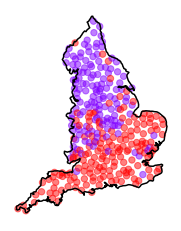

fist_lexical_item.csv
Potts, likelihood ratio =  11.75738980130643  mu =  200
Moran I =  0.745543566959833
FOOT-STRUT_split.csv
Potts, likelihood ratio =  4.977787131203883  mu =  100
Moran I =  0.6952560083594564
frog_lexical_item.csv
Potts, likelihood ratio =  20.024177567358464  mu =  200
Moran I =  0.6157312925170068
f_to_v.csv
Potts, likelihood ratio =  24.76487597453263  mu =  300
Moran I =  0.8021500492088729
get_preterite.csv
Potts, likelihood ratio =  14.747695031360934  mu =  200
Moran I =  0.6305180533751963
grow_preterite.csv
Potts, likelihood ratio =  0.9385988116097224  mu =  100
Moran I =  0.48849380242894713
happY_tensing.csv
Potts, likelihood ratio =  15.45961264258824  mu =  100
Moran I =  0.5894100923951671
hedgehog_lexical_item.csv
Potts, likelihood ratio =  26.69474782980015  mu =  150
Moran I =  0.6174410384936703
h_dropping.csv
Potts, likelihood ratio =  20.25902768771786  mu =  100
Moran I =  0.5286050492083867
intrusive_r.csv
Potts, likelihood ratio =  10.06237

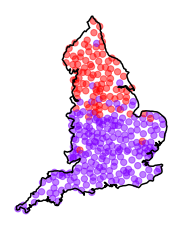

newt_lexical_item.csv
Potts, likelihood ratio =  9.479668683774008  mu =  150
Moran I =  0.6474771241830068
ng_coalescence.csv
Potts, likelihood ratio =  16.554025664849377  mu =  200
Moran I =  0.5326753246753245
owl_lexical_item.csv
Potts, likelihood ratio =  13.443857902966528  mu =  200
Moran I =  0.45008988551423984
partridge_final_consonant.csv
Potts, likelihood ratio =  16.979203124371622  mu =  300
Moran I =  0.5792642140468227
pea_backformation.csv
Neutral, likelihood ratio =  3.427413386118644 b =  0.99
Moran I =  0.0723016114320462


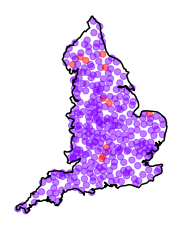

porridge_final_consonant_devoicing.csv
Potts, likelihood ratio =  16.530839133885507  mu =  200
Moran I =  0.612571798398188
possessive_pronouns.csv
Neutral, likelihood ratio =  3.746675113043068 b =  0.85
Moran I =  0.48384988797610157


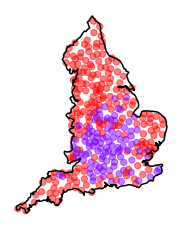

postvocalic_t_glottalisation.csv
Potts, likelihood ratio =  6.269785297504654  mu =  200
Moran I =  0.20184071665235004
postvocalic_t_voicing.csv
Potts, likelihood ratio =  10.066752020777415  mu =  200
Moran I =  0.2198589256646773
pour_lexical_item.csv
Potts, likelihood ratio =  10.727911002126376  mu =  150
Moran I =  0.7228070175438597
prevocalic_r_backing.csv
Potts, likelihood ratio =  16.687551900227447  mu =  300
Moran I =  0.7720000000000002
prevocalic_r_retroflexion.csv
Potts, likelihood ratio =  29.776593147781455  mu =  300
Moran I =  0.8775462962962964
reach_palatalisation.csv
Neutral, likelihood ratio =  6.188205886722415 b =  0.99
Moran I =  0.4288524590163933


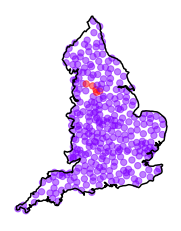

rhoticity.csv
Potts, likelihood ratio =  6.383249376688184  mu =  150
Moran I =  0.587821583695289
rV_metathesis.csv
Potts, likelihood ratio =  10.114846728904155  mu =  200
Moran I =  0.3269731421980557
r_to_hr.csv
Neutral, likelihood ratio =  8.091791813720192 b =  0.99
Moran I =  0.12225841476655808


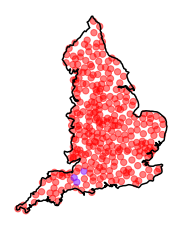

snail_lexical_item.csv
Potts, likelihood ratio =  26.302199906958577  mu =  200
Moran I =  0.755116883116883
THOUGHT_hyperrhoticity.csv
Potts, likelihood ratio =  12.759172000166757  mu =  300
Moran I =  0.3058165548098436
THOUGHT_monophthongisation.csv
Neutral, likelihood ratio =  3.0975299130154497 b =  0.85
Moran I =  0.4428571428571429


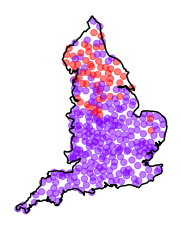

th_fronting_before_r.csv
Neutral, likelihood ratio =  5.965038024887065 b =  0.99
Moran I =  -0.015081967213114753


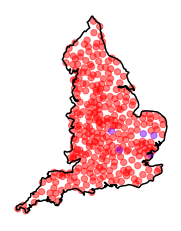

th_fronting_elsewhere.csv
Neutral, likelihood ratio =  7.4760639935117865 b =  0.99
Moran I =  0.06491803278688522


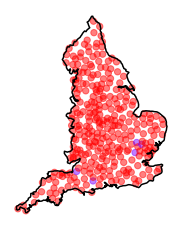

th_stopping_before_r.csv
Potts, likelihood ratio =  23.08834519984964  mu =  300
Moran I =  0.772175317524411
th_voicing.csv
Potts, likelihood ratio =  13.09498102378879  mu =  300
Moran I =  0.48028673835125446
upstairs_lexical_item.csv
Potts, likelihood ratio =  19.70203440964616  mu =  200
Moran I =  0.5072888406583468
vinegar_lexical_item.csv
Potts, likelihood ratio =  7.972029769019059  mu =  200
Moran I =  0.4019999999999999
wasp_metathesis.csv
Potts, likelihood ratio =  7.374241584117328  mu =  100
Moran I =  0.6481521739130436
worse_to_worser.csv
Potts, likelihood ratio =  7.0580832505469004  mu =  300
Moran I =  0.19502108010439673
worse_waur_borrowing.csv
Potts, likelihood ratio =  1.7062833631290175  mu =  200
Moran I =  0.5604304635761589
wrist_lexical_item.csv
Potts, likelihood ratio =  10.741989327278588  mu =  200
Moran I =  0.33961051997590846
yawning_lexical_item.csv
Potts, likelihood ratio =  1.9739432814002953  mu =  50
Moran I =  0.2748219417718355
yeast_lexical_ite

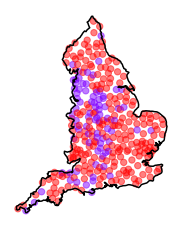

In [34]:
importlib.reload(util)
models = []
for file in files:
    print(file)
    df = util.get_SED_df(sed_data_folder,file)
    states = df['states']
    model = ML(states)
    models.append(model)
    print('Moran I = ', util.moran_I(states,AI))
    if model== 'Neutral':
        util.plot_SED_file(sed_data_folder,file,XB)
models=np.array(models)

In [44]:
mods, cnts = np.unique(models,return_counts=True)
print(cnts)
print(100*cnts[1]/(cnts[0]+cnts[1]))

[14 54]
79.41176470588235
